In [3]:
import pynwb

from datetime import datetime
from uuid import uuid4

import numpy as np
from dateutil import tz

from pynwb import NWBHDF5IO, NWBFile, TimeSeries
from pynwb.behavior import Position, SpatialSeries
from pynwb.epoch import TimeIntervals
from pynwb.file import Subject


import numpy as np
import math
import matplotlib.pyplot as plt

In [126]:
all_files = ['Data/sub-monk-g_ses-session0 (1).nwb',
             'Data/sub-monk-g_ses-session2.nwb',
             'Data/sub-monk-g_ses-session3.nwb',
             'Data/sub-monk-g_ses-session4.nwb',
             'Data/sub-monk-g_ses-session5.nwb',
             'Data/sub-monk-g_ses-session6.nwb']

In [119]:
all_files = ['Data/sub-monk-j_ses-session0.nwb', 
             'Data/sub-monk-j_ses-session1.nwb',
             'Data/sub-monk-j_ses-session2.nwb',
             'Data/sub-monk-j_ses-session3.nwb']

(137749, 2)
(237585, 2)
(201709, 2)
(141347, 2)
(152485, 2)
(68778, 2)


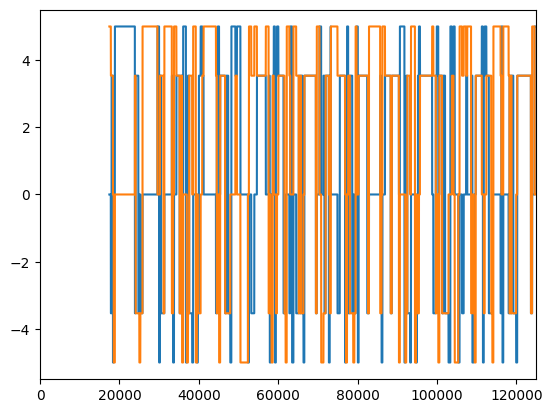

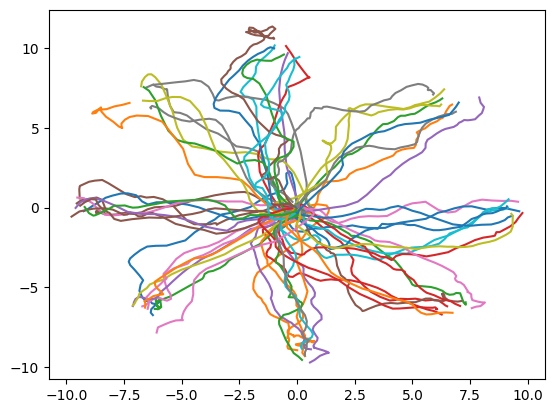

<Figure size 640x480 with 0 Axes>

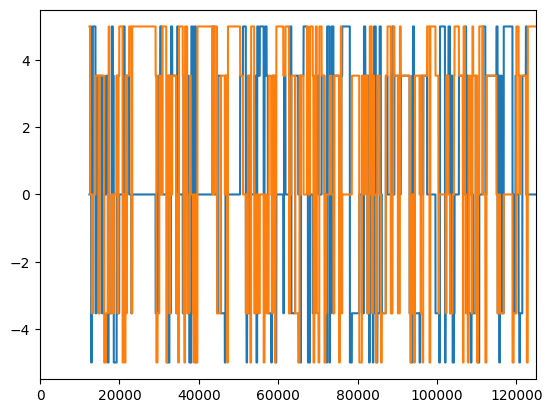

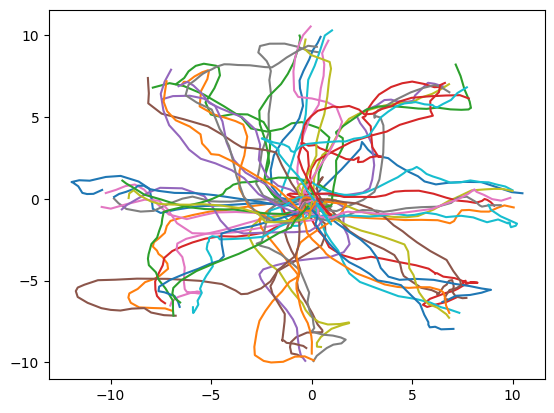

<Figure size 640x480 with 0 Axes>

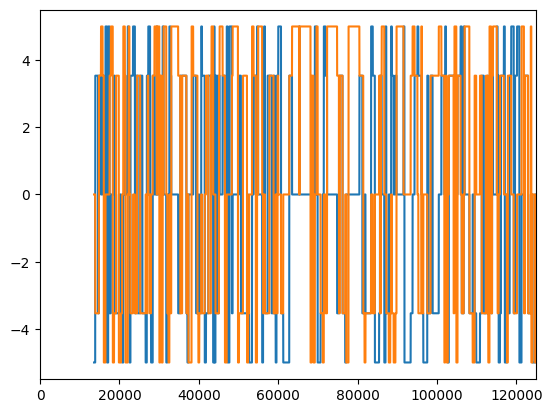

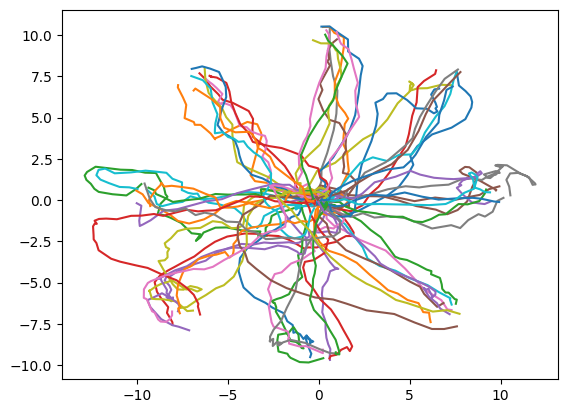

<Figure size 640x480 with 0 Axes>

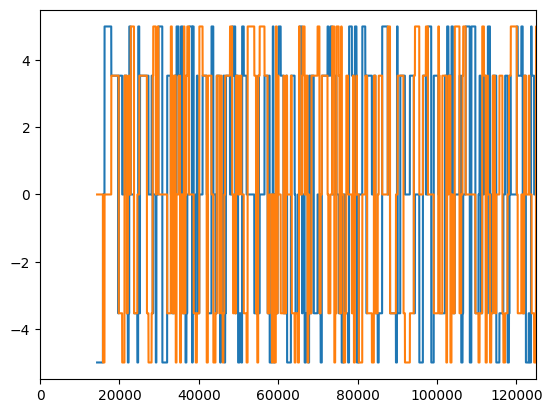

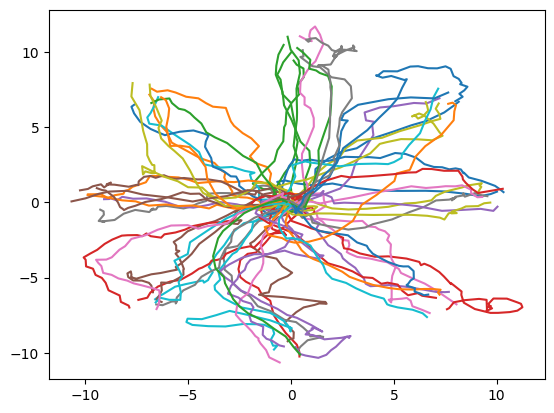

<Figure size 640x480 with 0 Axes>

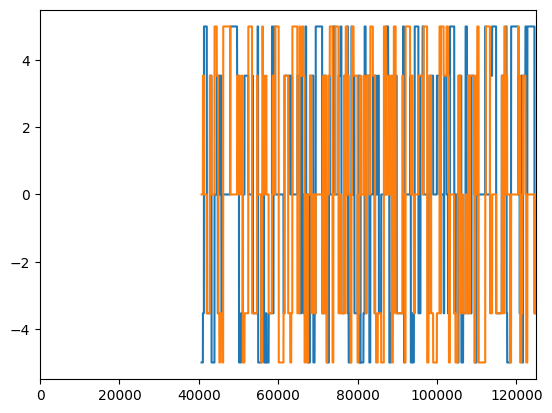

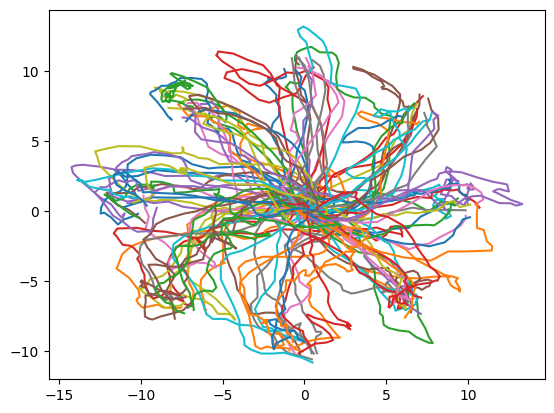

<Figure size 640x480 with 0 Axes>

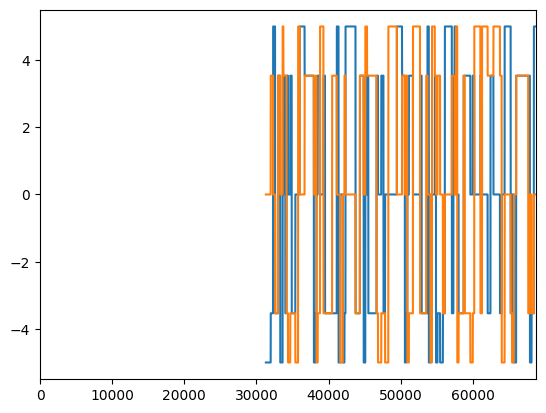

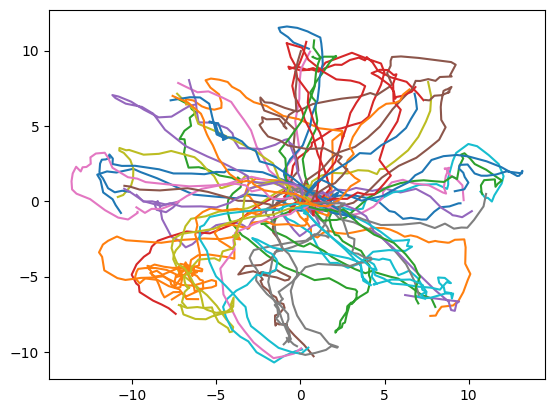

<Figure size 640x480 with 0 Axes>

In [128]:
jj=0
use_trial = [0 for jj in range(len(all_files))]
file_name = all_files[jj]
#file_name='Data/sub-monk-j_ses-session1.nwb'
acqRate=60

for jj in range(len(all_files)):
    file_name=all_files[jj]
    with NWBHDF5IO( file_name , "r") as io:
        read_nwbfile = io.read()    
        obs = read_nwbfile.processing['behavior']['obstacle_position'].data
        total_cursor_positions = read_nwbfile.processing["behavior"]["cursor"].data[:]
        #total_cursor_positions = total_cursor_positions - np.mean(total_cursor_positions, axis=0)
        print(obs.shape)
        plt.figure()
        plt.plot(obs)
        plt.xlim([0,min(125000, len(obs))])
        ids=np.where(np.sum(np.abs(obs),axis=1)>0)
        trial_num = len(read_nwbfile.trials["id"].data)
        start_Index = np.int_(np.zeros(trial_num))
        
        for trial_id in range(trial_num):  
            start_time = read_nwbfile.trials["start_time"].data[trial_id]
            start_Index[trial_id] = round(start_time*acqRate - 1)
            
        sid = np.where(start_Index>ids[0][0])[0]-1
        if len(sid)>1:
            use_trial[jj] = sid[0]*2
        else:
            use_trial[jj] = trial_num

        plt.figure()
        for trial_id in range(use_trial[jj]):  
            stop_time = read_nwbfile.trials["stop_time"].data[trial_id]
            stop_Index = round(stop_time*acqRate - 1)
            plt.plot(total_cursor_positions[start_Index[trial_id]:stop_Index+1,0], total_cursor_positions[start_Index[trial_id]:stop_Index+1,1])


        plt.figure()

    
    #print(obs.shape)

In [125]:
read_nwbfile

root pynwb.file.NWBFile at 0x10827780480
Fields:
  experiment_description: Single unit recordings from chronically implanted microwire                 electrode array in PMd/M1 used for BMI control using Kalman filter decoder. File includes BMI-unit spike counts,                 BMI task parameters, and BMI cursor data used for analysis. TimeSeries are reported at 200 hz, BMI update rate was 200 Hz.                 Raw electrophysiolgy data files are not included
  experimenter: ['Orsborn, Amy']
  file_create_date: [datetime.datetime(2023, 1, 20, 9, 48, 8, 271864, tzinfo=tzoffset(None, -28800))]
  identifier: MonkeyJ_session3
  institution: UC Berkeley
  intervals: {
    trials <class 'pynwb.epoch.TimeIntervals'>
  }
  lab: Carmena lab
  processing: {
    behavior <class 'pynwb.base.ProcessingModule'>
  }
  session_description: Monkey performing 2D cursor BMI
  session_id: session3
  session_start_time: 2013-08-31 00:00:00-07:00
  subject: subject pynwb.file.Subject at 0x6397162016
Fields:
  age: P12Y
  description: mmu 35195
  sex: M
  species: Macaca mulatta
  subject_id: monk_j

  timestamps_reference_time: 2013-08-31 00:00:00-07:00
  trials: trials <class 'pynwb.epoch.TimeIntervals'>

In [96]:
ids[0]

array([ 17452,  17453,  17454, ..., 137746, 137747, 137748])

In [95]:
np.where(start_Index>ids[0][0])

(array([ 64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,
         77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,
         90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102,
        103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115,
        116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128,
        129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141,
        142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154,
        155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167,
        168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180,
        181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193,
        194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206,
        207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219,
        220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232,
        233, 234, 235, 236, 237, 238, 239, 240, 241

In [124]:
start_Index

array([   726,   1556,   2323,   3140,   4050,   4761,   5472,   6332,
         7286,   7972,   9113,   9793,  10741,  12219,  12930,  13703,
        15037,  16004,  16740,  17600,  18299,  19053,  19858,  20817,
        23680,  24334,  24908,  25543,  26254,  27202,  27906,  28648,
        29552,  30407,  31192,  32009,  32611,  33437,  34291,  35314,
        36343,  37359,  38401,  39517,  40253,  40814,  41762,  42666,
        43813,  44861,  45790,  46326,  47243,  48028,  49076,  50192,
        51277,  52369,  53042,  54040,  54901,  55675,  57190,  57895,
        58811,  59771,  60944,  62016,  62646,  63332,  64112,  64841,
        65577,  66556,  67454,  68271,  68832,  69674,  70553,  71370,
        74375,  76096,  78384,  81283,  83859,  85928,  88316,  89987,
        91265,  93654,  98330,  99764, 109951, 113162, 114977, 119972,
       122422, 123594, 125826, 127697, 128962, 130047, 131862, 135160,
       137281, 138627, 139793, 141108, 152301, 154583, 156379, 160158,
      

In [123]:
use_trial

[198, 15, 89, 79]